这个程序有什么用：
只能客服机器人
微软小冰
大量的if...else，大量的规则要做的时候
一旦场景变了，很多代码重写。  

## Data Driven

期望我们的程序，能够根据数据的输入，自动改变程序

In [3]:
hello_rules = '''
say_hello = name hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''

In [6]:
rules = dict() #key is the @statement, value is @expression

In [7]:
'add number + number'

'add number + number'

In [8]:
def get_generation_by_gram(grammar_str : str, target, stmt_split = '=' , or_split = '|'):
    
    #把语法规则编程一个字典存储的内容
    rules = dict() #key is the @statement, value is @expression    
    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
        #print (line)
        stmt, expr = line.split(stmt_split)

        #print (stmt, expr.split(or_split))

        rules[stmt.strip()] = expr.split(or_split)
    print (rules)
    #生成句子
    generated = generate(rules,  target)
    return generated
       

In [9]:
#根据语法字典，与需要的目标，生成一个可随机变化的语句
def generate(grammar_rule, target):
    
    if  target in grammar_rule : #names
        condidates = grammar_rule[target] #['name names', name]
        candidate = random.choice(condidates)
        return ''.join(generate(grammar_rule, target = c.strip()) for c in candidate.split(' ')) #递归
    else:
        return target
    

In [10]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [62]:
simple_programming = '''
if_stmt => if ( condition ) { stmt }
condition => var op var
op => > | == | < | >= | <=
stmt => assign | if_stmt
assign => var = var 
var => char var | char
char => a | b | c | d | 0 | 1 | 2 | 3



'''

In [52]:
for i in range(20):
    print(get_generation_by_gram(simple_programming, target='if_stmt', stmt_split='=>'))

{'if_stmt': [' if ( condition ) { stmt }'], 'condition': [' var op var'], 'op': [' > ', ' == ', ' < ', ' >= ', ' <='], 'stmt': [' assign ', ' if_stmt'], 'assign': [' var = var '], 'var': [' char var ', ' char'], 'char': [' a ', ' b ', ' c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']}
if(13<b){bc=112ab}
{'if_stmt': [' if ( condition ) { stmt }'], 'condition': [' var op var'], 'op': [' > ', ' == ', ' < ', ' >= ', ' <='], 'stmt': [' assign ', ' if_stmt'], 'assign': [' var = var '], 'var': [' char var ', ' char'], 'char': [' a ', ' b ', ' c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']}
if(0>=02){3c=d}
{'if_stmt': [' if ( condition ) { stmt }'], 'condition': [' var op var'], 'op': [' > ', ' == ', ' < ', ' >= ', ' <='], 'stmt': [' assign ', ' if_stmt'], 'assign': [' var = var '], 'var': [' char var ', ' char'], 'char': [' a ', ' b ', ' c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']}
if(02d>20c){ba0c0b=cc}
{'if_stmt': [' if ( condition ) { stmt }'], 'condition': [' var op var'], 'op': [' > ', ' == ', ' < ', ' >= ', 

In [53]:
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

{'sentence': [' noun_phrase verb_phrase'], 'noun_phrase': [' Article Adj* noun'], 'Adj*': [' Adj ', ' Adj Adj*'], 'verb_phrase': [' verb noun_phrase'], 'Article': ['  一个 ', ' 这个'], 'noun': ['   女人 ', '  篮球 ', ' 桌子 ', ' 小猫'], 'verb': [' 看着   ', '  坐在 ', '  听着 ', ' 看见'], 'Adj': ['  蓝色的 ', ' 好看的 ', ' 小小的']}


'一个小小的女人坐在一个蓝色的桌子'

In [38]:
condidates = rules['name']
candidate = random.choice(condidates)
print (candidate)

NameError: name 'rules' is not defined

In [16]:
generate(rules, target='say_hello')

'say_hello'

In [14]:
import random

In [18]:
def name ():
    return random.choice('Jhon | Mike | 老梁'.split('|'))

In [19]:
def hello():
    return random.choice('你好 | 您来啦 | 快请进'.split('|'))


In [20]:
def say_hello():
    return name() + ' ' + hello()

In [21]:
say_hello()

' 老梁  快请进'

In [10]:
corpus = 'article_9k.txt'

In [11]:
FILE = open(corpus).read()


In [12]:
def generate_by_pro(text_corpus, length = 20):
    return ''.join(random.sample(text_corpus, length))

In [15]:
generate_by_pro(FILE)

'气推国所相线举队完国位系业侯型立联成者中'

In [17]:
FILE[:50]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受'

In [8]:
import jieba

In [19]:
max_length = 1000000
sub_file = FILE[: max_length]

In [20]:
def cut(string):
    return list(jieba.cut(string))

In [21]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/7z/f6j_h1yx5hlggj5f7ds_t__r0000gn/T/jieba.cache
Loading model cost 0.677 seconds.
Prefix dict has been built succesfully.


In [22]:
len(TOKENS)

532454

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [23]:
words_count = Counter(TOKENS)

In [24]:
words_with_fre = [f for w, f in words_count.most_common()]

In [25]:
words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [26]:
words_count.most_common(10)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960)]

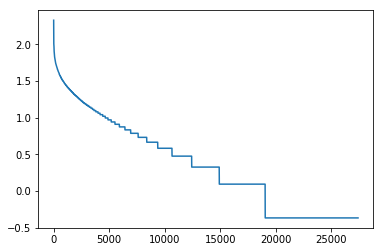

In [27]:
plt.plot(np.log(np.log(words_with_fre)))

# 在大量的文本中出现次数第二多的单词，它出现的概率是出现频率最高的单词的1/2，出现频率第三高的单词的频率是1/3

In [28]:
list(jieba.cut('一家手机最情报的是'))

['一家', '手机', '最', '情报', '的', '是']

In [29]:
_2_gram_words = [
    TOKENS[ i ] + TOKENS[ i+1 ]  for i in range(len(TOKENS) - 1) #把前后两个单词连接起来
]

In [30]:
_2_gram_words[ : 10 ]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [31]:
_2_gram_word_counts = Counter(_2_gram_words)

# Language Model
## input : Sentence(w1 ... wn)
## output: Pribability ( 0 -1)

2-Gram

$$ Pr ( sentence ) = Pr( w_1 \cdot w_2 \cdots w_n) = \prod \frac {count(w_i, w_{i+1})}{count(w_{i+1})} $$

1-gram(unigram)

$$ P(w_i) = \frac {C(w_i)} {\sum_{\forall k}{C(w_k)}}  =  \frac {C(w_i)}{N}$$

2-gram(Bigram)

$$ P(w_{i+1}| w_i) = \frac {C(w_i,w_{i+1})} {\sum_{\forall k}{C(w_i,w_k)}}  =  \frac {C(w_i,w_{i+1})}{C(w_i)}$$

In [32]:
#没见过的单词的处理方法,有可能没见过的单词并不是1。
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [33]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [34]:
def get_gram_count(word, wc):
    if word in wc : return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [35]:
get_gram_count('XXX', words_count)

1

In [36]:
def two_gram_model(sentence):
    tokens = cut(sentence)
    probability = 1
    for i in range(len(tokens) - 1):
        word = tokens[i] #当前的单词
        next_word = tokens[ i + 1 ] #next word
        
        pro = get_gram_count(word + next_word , _2_gram_word_counts ) / get_gram_count( next_word, words_count)
        
        probability *= pro
    return probability
        
        

In [37]:
two_gram_model('我')

1